In [2]:
import pandas as pd

df = pd.read_excel('data/GDL RegionConnect dataset .xlsx')
print(df.shape)
df.head()

(1953, 7)


,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling
0,Afghanistan,AFG,National,AFGt,Total,0.511,3.900
1,Afghanistan,AFG,Subnat,AFGr101,Central (Kabul Wardak Kapisa Logar Parwan Panj...,0.591,6.500
2,Afghanistan,AFG,Subnat,AFGr102,Central Highlands (Bamyan Daikundi),0.501,2.426
3,Afghanistan,AFG,Subnat,AFGr103,East (Nangarhar Kunar Laghman Nooristan),0.493,4.344
4,Afghanistan,AFG,Subnat,AFGr104,North (Samangan Sar-e-Pul Balkh Jawzjan Faryab),0.530,3.995


In [ ]:
import geopandas
gdl_shapes = geopandas.read_file("data/GDL Shapefiles V5 11-21.shp")
gdl_shapes.head()

In [7]:
gdl_shapes.crs = "EPSG:4326"
gdl_shapes['polygon_area'] = gdl_shapes['geometry'].to_crs({'proj':'cea'}).area / 10**6
gdl_shapes.head()

,gdlcode,continent,iso_code,geometry,polygon_area
0,AFGr101,Asia/Pacific,AFG,"POLYGON ((69.41367 33.91973, 69.40897 33.91796...",28688.928201
1,AFGr102,Asia/Pacific,AFG,"POLYGON ((65.32353 33.12133, 65.34240 33.17651...",32081.032741
2,AFGr103,Asia/Pacific,AFG,"POLYGON ((70.46561 33.92853, 70.45656 33.92963...",25425.889283
3,AFGr104,Asia/Pacific,AFG,"POLYGON ((66.38873 34.93133, 66.36456 34.93081...",76616.435282
4,AFGr105,Asia/Pacific,AFG,"POLYGON ((67.35538 34.88549, 67.35532 34.88847...",85191.715183


In [8]:
subgrid_df = pd.read_csv('data/subgrid.csv')
subgrid_df = subgrid_df.merge(df,left_on="GDLcode",right_on="GDLCODE", how="left")
subgrid_df.head()

/home/max/software/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,lat_05,lon_05,LAT,LON,LAT_25,LON_25,LAT_5,LON_5,knutson_precip,updated_precip,...,area,is_land,GDLcode,Country,ISO_Code,Level,GDLCODE,Region,Sub-national HDI,Mean years schooling
0,-89.75,-179.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,1685.654015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-89.75,-179.25,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,1685.654015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-89.75,-178.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,1685.654015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-89.75,-178.25,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,1685.654015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-89.75,-177.75,-88.75,-178.75,-88.75,-178.75,-87.5,-177.5,NaN,NaN,...,1685.654015,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '0.5 degree grid cells')

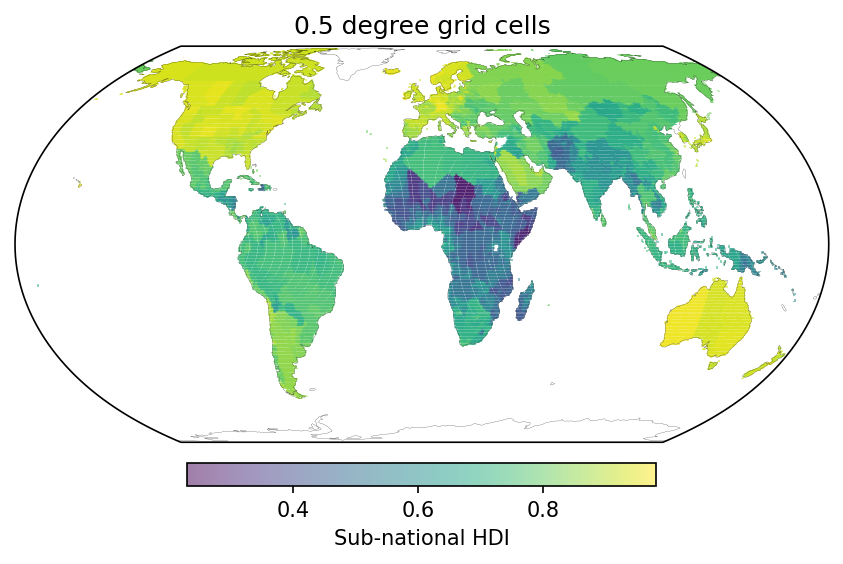

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(dpi=150, figsize=(7,4.5))

ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

n = np.array(subgrid_df['Sub-national HDI']).reshape(len(subgrid_df.lat_05.unique()),len(subgrid_df.lon_05.unique()))

mesh = ax.pcolormesh(
    subgrid_df.lon_05.unique(),
    subgrid_df.lat_05.unique(),
    n,
    alpha=0.5,
    transform=ccrs.PlateCarree(),
)

cbar = plt.colorbar(mesh, orientation="horizontal",fraction=0.046, pad=0.04)
cbar.set_label('Sub-national HDI')

ax.set_title('0.5 degree grid cells')

In [21]:
agg_data = pd.read_excel('data/change_temp_prec_perc_of_area.xlsx').merge(gdl_shapes,left_on="GDLcode",right_on="gdlcode").fillna(0)
print(agg_data.shape)
agg_data.head()

(1600, 9)


,GDLcode,updated_temp_perc,updated_prec_perc,total_area,gdlcode,continent,iso_code,geometry,polygon_area
0,AFGr101,1.000000,0.000000,7.651789e+05,AFGr101,Asia/Pacific,AFG,"POLYGON ((69.41367 33.91973, 69.40897 33.91796...",28688.928201
1,AFGr102,1.000000,0.000000,8.956093e+05,AFGr102,Asia/Pacific,AFG,"POLYGON ((65.32353 33.12133, 65.34240 33.17651...",32081.032741
2,AFGr103,0.492361,0.507639,5.062519e+05,AFGr103,Asia/Pacific,AFG,"POLYGON ((70.46561 33.92853, 70.45656 33.92963...",25425.889283
3,AFGr104,1.000000,0.000000,1.869439e+06,AFGr104,Asia/Pacific,AFG,"POLYGON ((66.38873 34.93133, 66.36456 34.93081...",76616.435282
4,AFGr105,1.000000,0.062758,1.985859e+06,AFGr105,Asia/Pacific,AFG,"POLYGON ((67.35538 34.88549, 67.35532 34.88847...",85191.715183


/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/max/software/py39/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


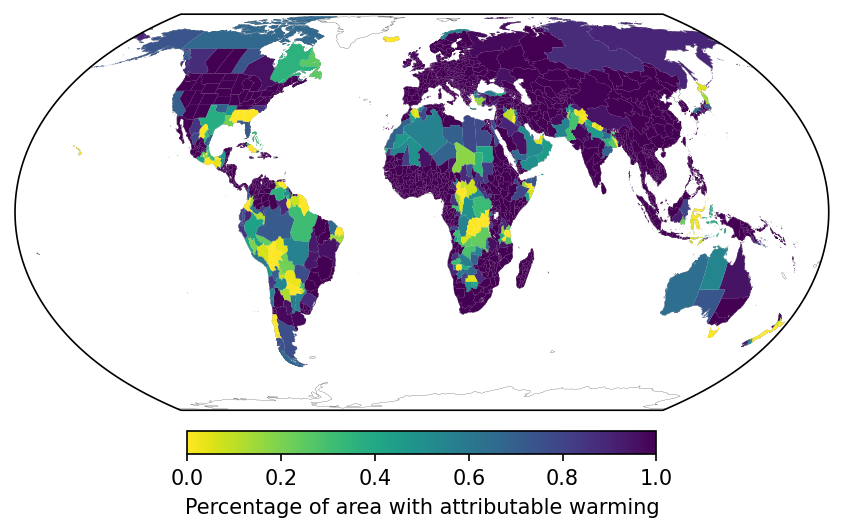

In [29]:
import geoplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(7,4.5))
ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

import matplotlib as mpl

cmap = mpl.cm.get_cmap('viridis_r')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

#ax.add_geometries(merged.geometry, lw=0.1, linestyle=':',crs=ccrs.EqualEarth(),color=colors)
for i, row in agg_data.iterrows():
    ax.add_geometries(
        [row['geometry']],color=cmap(row['updated_temp_perc']), 
        crs=ccrs.PlateCarree(),lw=0.1, linestyle=':',ec="black"
    )
    
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, orientation="horizontal",
    fraction=0.046, pad=0.04
)
cbar.set_label('Percentage of area with attributable warming')

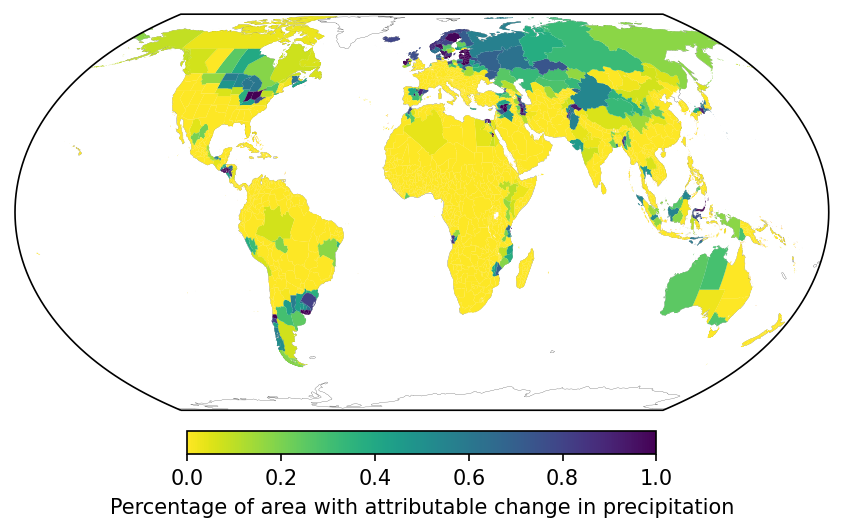

In [30]:
import geoplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=150, figsize=(7,4.5))
ax = plt.subplot(projection=ccrs.EqualEarth())

ax.coastlines(lw=0.1)

import matplotlib as mpl

cmap = mpl.cm.get_cmap('viridis_r')
norm = mpl.colors.Normalize(vmin=0, vmax=1)

#ax.add_geometries(merged.geometry, lw=0.1, linestyle=':',crs=ccrs.EqualEarth(),color=colors)
for i, row in agg_data.iterrows():
    ax.add_geometries(
        [row['geometry']],color=cmap(row['updated_prec_perc']), 
        crs=ccrs.PlateCarree(),lw=0.1, linestyle=':',ec="black"
    )
    
cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=norm, cmap=cmap), 
    ax=ax, orientation="horizontal",
    fraction=0.046, pad=0.04
)
cbar.set_label('Percentage of area with attributable change in precipitation')

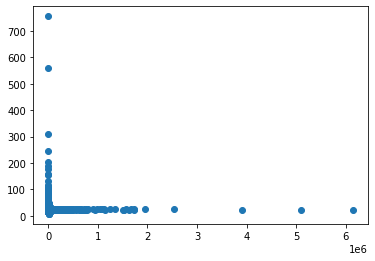

In [27]:
agg_data['area_deviation'] = (agg_data['total_area'] - agg_data['polygon_area']) / agg_data['polygon_area']

fig, ax = plt.subplots()

ax.scatter(agg_data['polygon_area'],agg_data['area_deviation'])



In [28]:
agg_data[agg_data['area_deviation']>1]

,GDLcode,updated_temp_perc,updated_prec_perc,total_area,gdlcode,continent,iso_code,geometry,polygon_area,area_deviation
0,AFGr101,1.000000,0.000000,7.651789e+05,AFGr101,Asia/Pacific,AFG,"POLYGON ((69.41367 33.91973, 69.40897 33.91796...",28688.928201,25.671576
1,AFGr102,1.000000,0.000000,8.956093e+05,AFGr102,Asia/Pacific,AFG,"POLYGON ((65.32353 33.12133, 65.34240 33.17651...",32081.032741,26.917097
2,AFGr103,0.492361,0.507639,5.062519e+05,AFGr103,Asia/Pacific,AFG,"POLYGON ((70.46561 33.92853, 70.45656 33.92963...",25425.889283,18.910882
3,AFGr104,1.000000,0.000000,1.869439e+06,AFGr104,Asia/Pacific,AFG,"POLYGON ((66.38873 34.93133, 66.36456 34.93081...",76616.435282,23.399974
4,AFGr105,1.000000,0.062758,1.985859e+06,AFGr105,Asia/Pacific,AFG,"POLYGON ((67.35538 34.88549, 67.35532 34.88847...",85191.715183,22.310471
...,...,...,...,...,...,...,...,...,...,...
1595,ZWEr104,1.000000,0.000000,1.403410e+06,ZWEr104,Africa,ZWE,"POLYGON ((30.37916 -18.83976, 30.36814 -18.836...",57396.720621,23.451053
1596,ZWEr105,1.000000,0.000000,1.830265e+06,ZWEr105,Africa,ZWE,"POLYGON ((28.66857 -20.30021, 28.65701 -20.284...",75500.546436,23.241751
1597,ZWEr106,1.000000,0.000000,1.369476e+06,ZWEr106,Africa,ZWE,"POLYGON ((31.05947 -22.33982, 31.05900 -22.339...",54675.712765,24.047250
1598,ZWEr107,1.000000,0.000000,1.314616e+06,ZWEr107,Africa,ZWE,"POLYGON ((29.47790 -21.02500, 29.47499 -21.022...",49440.085409,25.590079
